IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

- Amine YOUCEF KHODJA
- Malik DOUFENE

<b>Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.</b>
Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

<b>Les groupes de plus de 2 personnes ne sont pas autorisés.</b>

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2022


<font size="+1" color="RED"><b>Date de rendu : lundi 9 mai, 19h au plus tard</b></font>
    
(<b>attention! le site Moodle ferme à 19h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...)


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données Agribalise qui sont des données ouvertes dont la documentation peut être consultée ici : https://doc.agribalyse.fr/documentation/acces-donnees

Très important : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- Donnees_Agribalyse/
                  -- detail_ingredient.csv
                  -- detail_etape.csv
                  -- synthese.csv

Dans le notebook, le chargement des fichiers de données considèrera donc cette arborescence.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive du répertoire iads/
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: Les fichiers de données ne doivent pas être inclus dans votre archive !

## Soutenance des projets
La soutenance sera organisée après la semaine d'examens de mai entre le 17 et le 25 mai (la date sera précisé sur le forum du Moodle).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




# Repartition

Le travail est decomposé en deux notebooks , un pour la demarche supervisé et l'autre pour la non-supervisée.

# Problematiques Supervisées



## Exemples

In [2]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import time
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de Clustering
from iads import clustering as clust

import warnings
warnings.filterwarnings('ignore')

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

## Importation des Données

In [5]:
data_synthese = pd.read_csv("Donnees_Agribalyse/synthese.csv")
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))

Nombre de lignes:  2479


In [5]:
data_synthese.loc[0:5]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
4,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.061462,0.007254,0.025954,0.204244,0.943669,43.838644,41.957928,1.412878,17.123820,2.173328
5,13001,13001,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, sec","Apricot, pitted, dried",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.315730,0.041668,0.156978,1.036479,4.955795,248.627750,260.488540,7.717328,184.622520,11.016019


In [6]:
data_ingredient = pd.read_csv("Donnees_Agribalyse/detail_ingredient.csv")
data_ingredient.columns
print("Nombre de lignes: ",len(data_ingredient))

Nombre de lignes:  5671


In [7]:
data_ingredient.loc[0:5]

,Ciqual AGB,Ciqual code,Nom Français,Groupe d'aliment,Sous-groupe d'aliment,LCI Name,Ingredients,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jaune d'œuf,0.039743,0.164754,0.014089,...,0.046616,0.006761,0.029441,0.052027,1.329230,16.984964,7.404112,0.337769,1.475548,0.251356
1,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Ail,0.004417,0.011444,0.002512,...,0.000781,0.000105,0.000328,0.004760,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
2,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jus de citron,0.019375,0.061230,0.007842,...,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
3,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Huile d'olive,0.445364,1.161825,0.136467,...,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.100950,9.374618,12.100965,4.424012
4,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Autres étapes,0.080761,0.571172,0.126768,...,0.024611,0.002630,0.008368,0.090374,1.295442,4.529954,11.433712,0.759522,22.626111,1.278583
5,24664,24664,Gâteau aux amandes type financier,produits céréaliers,gâteaux et pâtisseries,Almond cake,Amande,0.349367,0.914647,0.070591,...,0.098041,0.012824,0.046970,0.406947,4.767077,64.110420,49.548089,27.024469,11.359491,8.104749


In [8]:
data_etape = pd.read_csv("Donnees_Agribalyse/detail_etape.csv")
data_etape.columns
print("Nombre de lignes: ",len(data_etape))

Nombre de lignes:  2480


In [9]:
data_etape.loc[0:5]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,DQR,Nom et code,Score unique EF (mPt / kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Transformation,...,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,DQR - P,DQR - TiR,DQR - GR,DQR - TeR
0,12112,12112,lait et produits laitiers,fromages,Abondance,"Abondance cheese, from cow's milk",2.24,Abondance (12112),0.470679,0.046274,...,2.855985,0.552672,0.108718,0.985193,0.148203,0.042714,2.84,2.05,1.18,2.87
1,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",2.46,"Abricot au sirop léger, appertisé, égoutté (13...",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
2,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",2.46,"Abricot au sirop léger, appertisé, non égoutté...",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.25,3.62,1.96,2.01
3,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",2.46,"Abricot au sirop, appertisé, égoutté (13714)",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
4,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",2.44,"Abricot au sirop, appertisé, non égoutté (13715)",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.21,3.65,1.92,1.97
5,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",2.20,"Abricot, dénoyauté, cru (13000)",0.061101,0.000000,...,1.277733,0.000000,0.150130,0.533833,0.205231,0.006400,1.96,3.54,1.66,1.66


### Premieres Idées

- Prediction du groupe d'aliment 
- Clusteing en sous-groupe au sein d'un groupe d'aliment
- Clustering en groupe d'aliment tous le jeu de données
- Prediction si l'aliment est transporté par avion ou pas
- Prediction du DQR (note de qualité) d'un certain aliment
- Retrouver un ingredient d'un aliment ( necciste une fusion des jeux de données )

# Probleme d'apprentissage supervisé

## Prediction d'un Groupe d'aliment

### Etude et Comprehension des Données

#### Fonctions rajoutées hors IADS

In [3]:
#--------------------------------------------------------------
# Renvoie la classe minoritaire de Y avec la difference valeurs avec la classe majoritaire
def classes_minoritaires(Y):
    uniques = np.unique(Y,return_counts=True)
    result = []
    maxi = np.max(uniques[1])
    for i in range(len(uniques[0])):
        if(uniques[1][i] != maxi):
            result.append((uniques[0][i],maxi-uniques[1][i]))
    return result
#-----------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------
def idx_min(X,Y,classe):
    res = []
    for i in range(len(Y)):
        if(Y[i] == classe):
            res.append(X[i])
        
    return res
#-----------------------------------------------------------------------------------------------

#--------------------------------------------------------------
# Re-echantillonage de classes minoritaires
# Permet de recompleter la classe avec des lignes choisies d'une maniere random 
def random_sampling(X,Y,verbose=False):
    cls = classes_minoritaires(Y)
    for classe in cls:
        exemples_min = idx_min(X,Y,classe[0]) 
        X = list(X)
        Y = list(Y)
        if(verbose):
            print("Rajouter",classe[1]," pour la classe",classe[0])
        for i in range(classe[1]):
            elem = rd.choice(np.arange(len(exemples_min)))
            X.append(exemples_min[elem])
            Y.append(classe[0])
        
    return (np.array(X),np.array(Y))
#-----------------------------------------


def extraire_col(data,num_col):
    return data[data.columns[num_col]]

#--------------------------------------------------------------------------------------

def pourc(tab):
    res = []
    for elem in tab:
        res.append((elem*100)/sum(tab))
    return res

#--------------------------------------------------------------------------------------
# Pour trouver les valeurs aberrantes d'un colonne
def trouver_outliers(data,var_name): 
    iqr = data[var_name].quantile(0.75) -  data[var_name].quantile(0.25) 
    born_inf = data[var_name].quantile(0.25)
    born_sup = data[var_name].quantile(0.75)
    return data[(data[var_name]<born_inf) | (data[var_name]>born_sup)],born_inf,born_sup

#--------------------------------------------------------------------------------------
# Renvoie les colonnes dont la correlation est superieur au seuil
def correlationBetweenFeatures(data,seuil):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>seuil : 
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

#--------------------------------------------------------------------------------------
# Renvoie la matrice de confusion entre un ensemble de prediction et un ensemble de vrai labels
def matrice_Confusion(expected, predicted,verbose=False):
    nb_classes = len(np.unique(expected))
    if(np.unique(expected).any() != np.unique(predicted).any()):
        print("Values Error")
    else:
        if(len(expected) != len(predicted)):
            print("Length Error !!!")
        else:
            m = [[0] * nb_classes for i in range(nb_classes)]
            for pred, exp in zip(predicted, expected):
                m[pred][exp] += 1
                
    if(verbose):
        for pred,exp in zip(predicted, expected):
            if(m[pred][exp] != 0):
                print("Expected : ",exp," predicted : ",pred ," ---> ",m[pred][exp])
                continue
    return m

In [11]:
print("Jeu de données à",data_synthese.shape[0],"lignes et",data_synthese.shape[1],"colonnes")
data_synthese.head(4)

Jeu de données à 2479 lignes et 27 colonnes


,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726


- Nous allons extraire directement les colonnes relatives aux informations sur les données du dataset comme les "LCI Name" ..etc.
- Elles seront pas utiles pour l'apprentissage du modele , en revanche elles seront utiles lors de l'intrepretation des resultats du modele.

In [12]:
data_synthese_infos = data_synthese[["Code AGB","Nom du Produit en Français","Code CIQUAL","LCI Name"]]
data_synthese_infos

,Code AGB,Nom du Produit en Français,Code CIQUAL,LCI Name
0,13712,"Abricot au sirop léger, appertisé, égoutté",13712,"Apricot, canned in light syrup, drained"
1,13713,"Abricot au sirop léger, appertisé, non égoutté",13713,"Apricot, canned in light syrup, not drained"
2,13714,"Abricot au sirop, appertisé, égoutté",13714,"Apricot, in syrup, canned, drained"
3,13715,"Abricot au sirop, appertisé, non égoutté",13715,"Apricot, in syrup, canned, not drained"
4,13000,"Abricot, dénoyauté, cru",13000,"Apricot, pitted, raw"
...,...,...,...,...
2474,19592,"Yaourt, lait fermenté ou spécialité laitière, ...",19592,"Yogurt, fermented milk or dairy specialty, wit..."
2475,19593,"Yaourt, lait fermenté ou spécialité laitière, ...",19593,"Yogurt, fermented milk or dairy specialty, plain"
2476,19594,"Yaourt, lait fermenté ou spécialité laitière, ...",19594,"Yogurt, fermented milk or dairy specialty, pla..."
2477,19598,"Yaourt, lait fermenté ou spécialité laitière, ...",19598,"Yogurt, fermented milk or dairy specialty, pla..."


Affichage des statistiques relatives aux données numeriques du dataset

In [13]:
data_synthese.describe()

,Code CIQUAL,Transport par avion (1 : par avion),DQR - Note de qualité de la donnée (1 excellente ; 5 très faible),Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),Rayonnements ionisants (kBq U-235 eq/kg de produit),Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit),Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
count,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000
mean,22446.076240,0.000807,2.810097,0.712264,5.909752,0.572436,1.239127,21.503554,0.576737,0.082070,0.322537,0.994563,28.171974,308.182513,110.487409,5.755834,53.483357,9.055566
std,14034.948243,0.028398,0.542470,0.885750,9.138402,4.913065,1.898260,42.971933,0.886995,0.131431,0.552303,2.567846,50.225766,659.117300,149.496454,17.266273,56.788961,19.029156
min,1000.000000,0.000000,1.600000,0.006130,0.021047,0.008919,0.040985,0.061076,0.001434,0.000112,0.000257,0.009151,0.029341,-125.337470,1.246828,-15.066491,2.029826,0.108256
25%,12759.500000,0.000000,2.430000,0.168917,1.086875,0.160290,0.448390,3.610219,0.081927,0.009345,0.032719,0.230663,4.955565,26.979608,32.244438,1.200812,23.001550,2.686771
50%,20511.000000,0.000000,2.760000,0.394124,2.718176,0.261981,0.821225,8.112630,0.237220,0.033240,0.119196,0.561079,13.013942,108.803440,74.607942,2.706662,34.986512,5.041574
75%,26105.000000,0.000000,3.110000,0.867402,6.289730,0.540185,1.352461,17.607225,0.692287,0.097694,0.343948,1.054684,27.858909,268.827470,134.641320,5.579348,62.902074,10.082564
max,96778.000000,1.000000,4.870000,6.085768,62.729303,243.449330,33.548897,328.588610,6.372366,0.945773,4.198274,33.277122,668.339590,5537.686700,2965.885600,463.921320,788.907720,258.657730


Affichage de la matrice de correlation sous forme de 'Heat Map de Seaborn' pour voir comment les features du jeu de données sont corrélées entre elles

<AxesSubplot:>

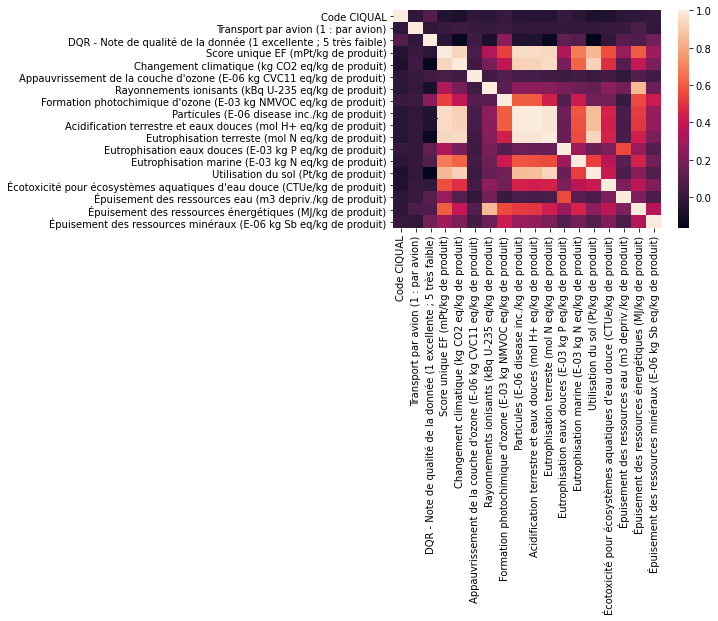

In [14]:
sns.heatmap(data_synthese.corr())

Nous remarquons apres visualisation de la heatmap , que certaines variables sont fortement corrélées entre elles ( les carrés plutot trés claires dans la map ).

Interpretation : apres quelques recherches sur le net , effectivement ces mesures ( Particules , Acidification terrestre et eaux douces , enthropisation terreste ) par exemple ont tendences à avoir une relation entre elles.

Consequence : Par la suite , nous seront amenes à supprimer les colonnes fortement corrélées avec une autre colonne . Cela s'explique avec le faite que le modele pourra avoir les informations de la colonne supprimée via l'autre colonne vu que cette derniere fortement corrélées avec elle. Cela permettera de moins complexifier la tache au modele afin d'eviter de tomber dans un probleme de sous-apprrentissage.  

Nous allons afficher les nuages de points des colonnes pour avoir comment elles sont reparties.

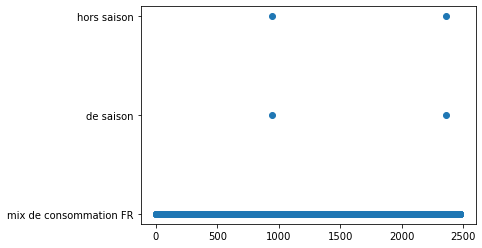

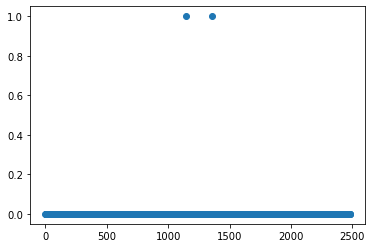

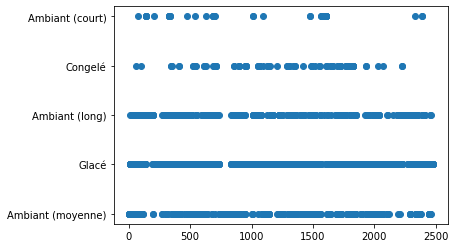

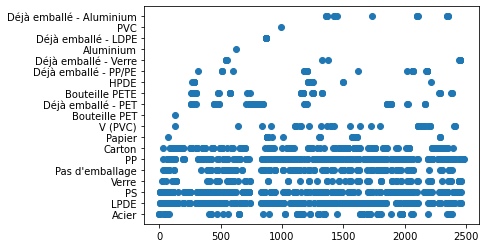

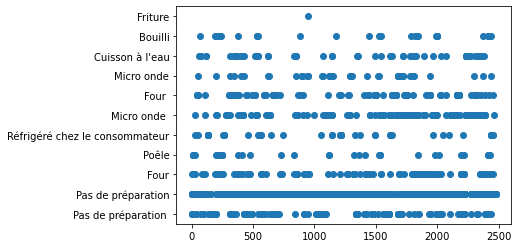

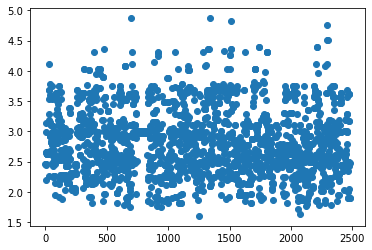

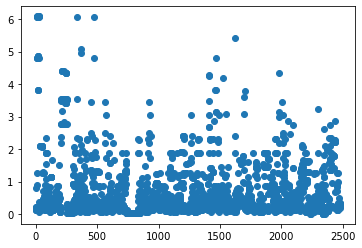

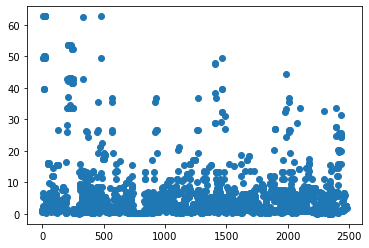

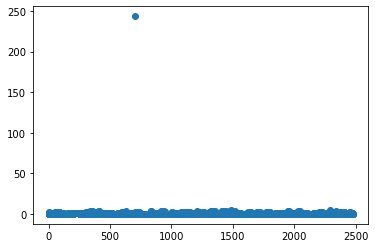

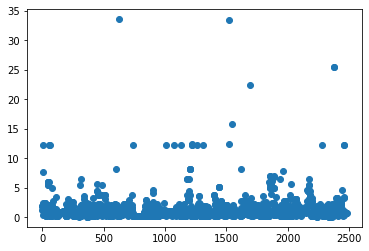

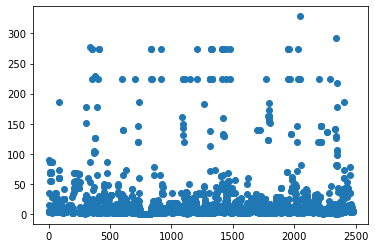

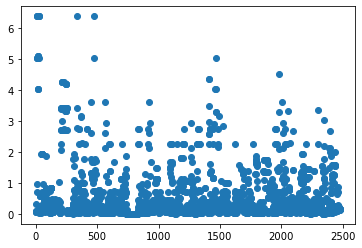

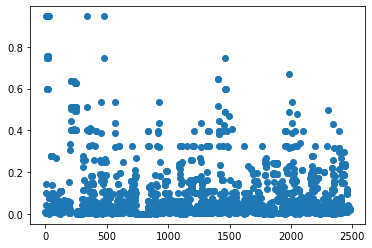

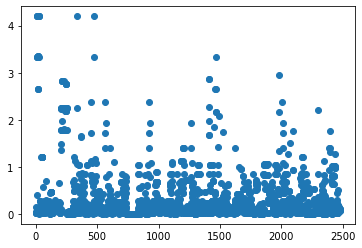

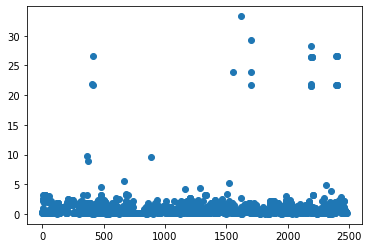

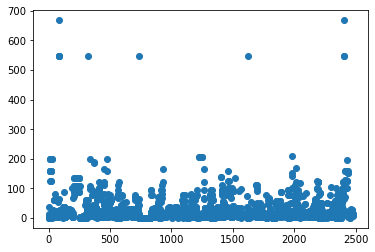

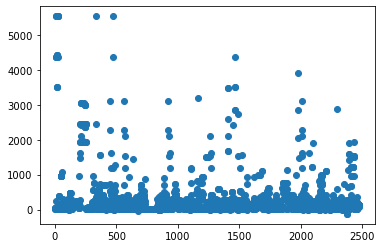

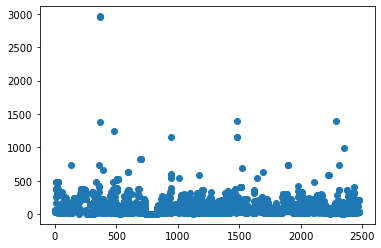

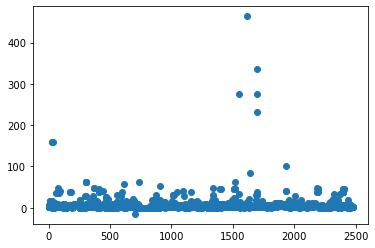

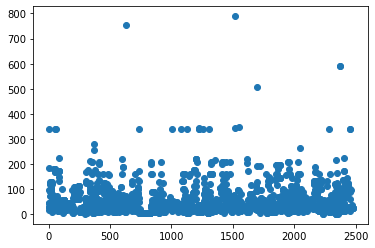

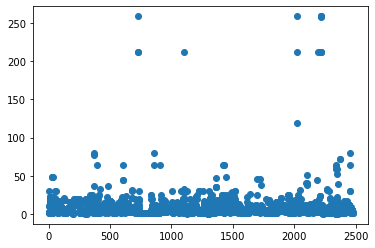

In [15]:
# Visualiser les nuages de points des variables "AVANT NETTOYAGE" pour voir a quoi on en a affaire !!
ind = [elem for elem in range(2479)]
for i in range(6,data_synthese.shape[1]):
    plt.scatter(ind,extraire_col(data_synthese,i))
    plt.show()

- Nous remarquons que pour certaines variables la distibution ne sont pas parfaites (appauvrissement de la couche d'ozone par exemple ) , la quasi totalité des données se reposent sur une region tant dit que certaines données (minimes) y sont tres loins de cette region !! --> c'est les outliers(valeurs aberrantes) : qu'on va regler un peu plus tard dans la demarche.
- Nous constatons que certaines variables categorielles sont fortement desiquilibrées .

<AxesSubplot:xlabel="Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)">

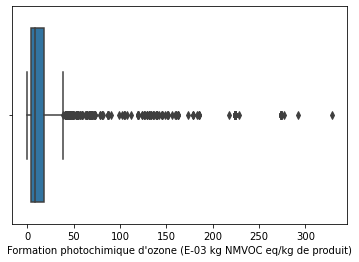

In [16]:
sns.boxplot(x="Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)",data=data_synthese)

<AxesSubplot:xlabel="Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)">

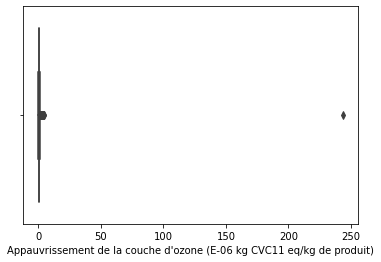

In [17]:
sns.boxplot(x="Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)",data=data_synthese)

<AxesSubplot:xlabel='Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)'>

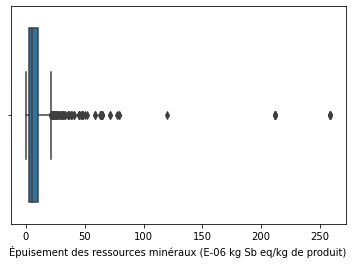

In [18]:
sns.boxplot(x="Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)",data=data_synthese)

En visualisant ce premier tableau de statistiques , on peut remarquer qu'il pourra y avoir apriori des outliers pour certaines variables .

<AxesSubplot:xlabel="Groupe d'aliment", ylabel='count'>

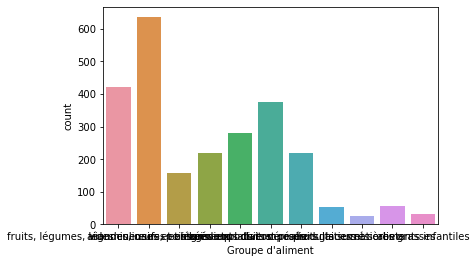

In [19]:
sns.countplot(data=data_synthese,x="Groupe d'aliment")

Nous constatons que cette variable (qui est la variable cible ) est largement desiquilibrée au niveau de certaines classes .
Cela peut affecter la qualité de notre modele (ou pas) , nous allons revenir à cette contrainte ulterierement.

<AxesSubplot:xlabel='Transport par avion (1 : par avion)', ylabel='count'>

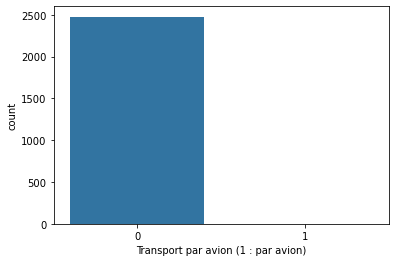

In [20]:
sns.countplot(data=data_synthese,x="Transport par avion (1 : par avion)")

Tous les aliments sauf 2 sont transportés sans avion !! cette variable peut etre supprimé pour ce probleme donné vu que quelque soit la classe recherchée de la variable cible sa valeur de transport est 0 !!

<AxesSubplot:xlabel='Livraison', ylabel='count'>

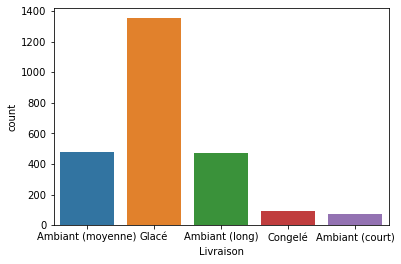

In [21]:
sns.countplot(data=data_synthese,x="Livraison")

<AxesSubplot:xlabel="Matériau d'emballage", ylabel='count'>

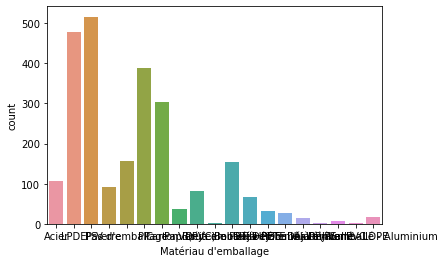

In [22]:
sns.countplot(data=data_synthese,x="Matériau d'emballage")

<AxesSubplot:xlabel='Saisonnalité', ylabel='count'>

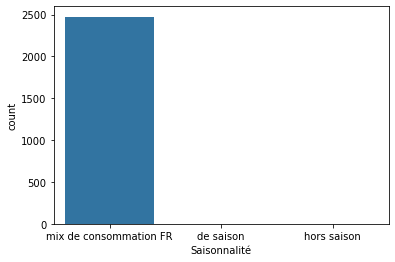

In [23]:
sns.countplot(data=data_synthese,x="Saisonnalité")

Presque tous les aliments sont de saisonnalité : "mix de consommation FR " !! cette variable peut etre supprimé pour ce probleme donné vu que quelque soit la classe recherchée de la variable cible la probabilité qu'elle soit "mix de consommation FR " est tres forte.Cela ne va pas aider à modele dans ses predictions mais plutot de les biaiser avec ces valeurs non significatives

<AxesSubplot:xlabel='Préparation', ylabel='count'>

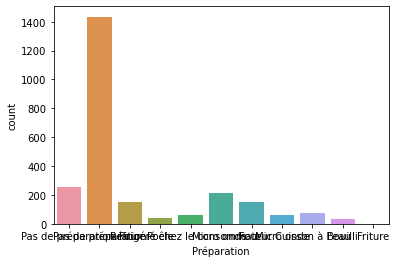

In [24]:
sns.countplot(data=data_synthese,x="Préparation")

In [25]:
np.unique(extraire_col(data_synthese,10))

array(['Bouilli', "Cuisson à l'eau", 'Four', 'Four ', 'Friture',
       'Micro onde', 'Micro onde ', 'Pas de préparation',
       'Pas de préparation ', 'Poêle', 'Réfrigéré chez le consommateur'],
      dtype=object)

Nous remarquons que certaines valeurs de la variable "Preparation" on ete recoltés avec une erreur de frappe (un espace a la fin ) . "Four  " et "Four" c'est la meme valeur donc autant remplacer tous les "Four  " par "Four" par exemple.

### Nettoyage des données

In [26]:
def dataPreparation(dataframe):
    # Sauvgrader les codes des aliments pour pourvoir interpreter la suite les resultats
    data_synthese_infos = dataframe[["Code AGB","Code CIQUAL","Nom du Produit en Français","LCI Name"]]
    
    # supprimer les colonnes jugées inutiles
    data_synthese_bis = dataframe.drop(columns=["Code AGB","Sous-groupe d'aliment","Code CIQUAL","Transport par avion (1 : par avion)","Saisonnalité","Nom du Produit en Français","LCI Name"])
   
    # remplacer les erreurs de frappe de la variable "Preparation"
    data_synthese_bis.loc[data_synthese_bis["Préparation"]=="Four ","Préparation"] = "Four"
    data_synthese_bis.loc[data_synthese_bis["Préparation"]=="Micro onde ","Préparation"] = "Micro onde"
    data_synthese_bis.loc[data_synthese_bis["Préparation"]=="Pas de préparation ","Préparation"] = "Pas de préparation"
   
    # Codifier la variable cible de la problematique
    # de 0 à 10 --> 11 groupes d'aliments
    a,v = np.unique(extraire_col(data_synthese_bis,0),return_counts=True)
    for elem in a:
        data_synthese_bis.loc[data_synthese_bis["Groupe d'aliment"]==elem,"Groupe d'aliment"] = list(a).index(elem)
    
    # Identifier les outliers et les remplacer par la valeur medianne de la variable associée
    here = data_synthese_bis.describe()
    colonnes = [col for col in here.columns]
    for col in colonnes:
        outliers = trouver_outliers(data_synthese_bis,col)[0]
        Q1 =  trouver_outliers(data_synthese_bis,col)[1]
        Q3 =  trouver_outliers(data_synthese_bis,col)[2]
        data_synthese_bis.loc[(outliers.index ,col)] = (Q3+Q1)/2
    
    # identification et suppression des variables qui sont fortement corrélées ( > seuil== 0.8 par exemple)
    corr_col = correlationBetweenFeatures(data_synthese_bis,0.8)
    data_synthese_bis.drop(corr_col,axis=1,inplace=True)
    
    # retourne le dataset préparé et les infos du dataset
    return data_synthese_bis,data_synthese_infos
    

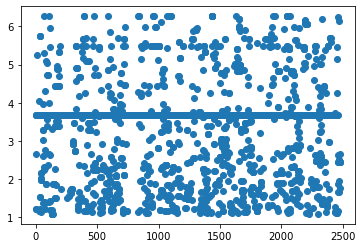

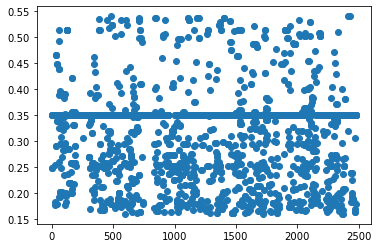

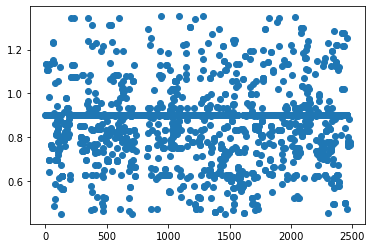

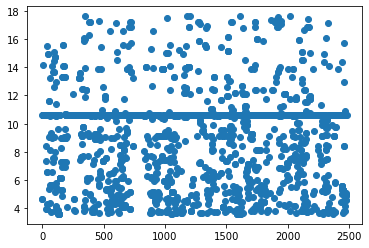

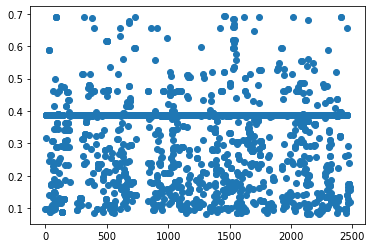

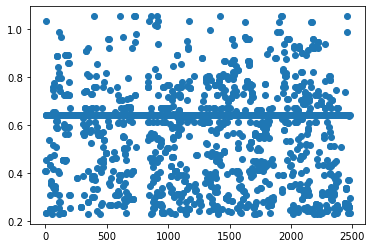

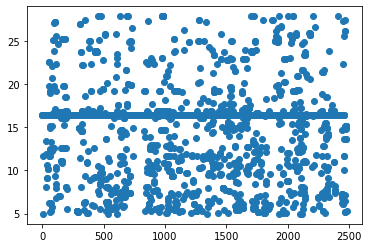

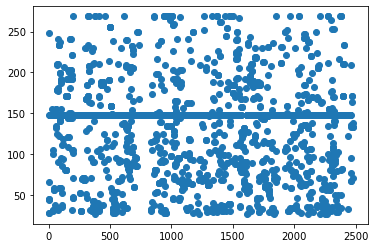

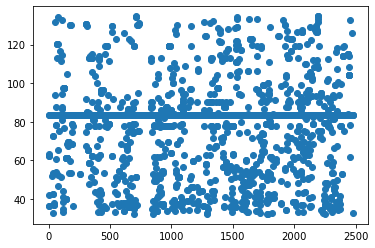

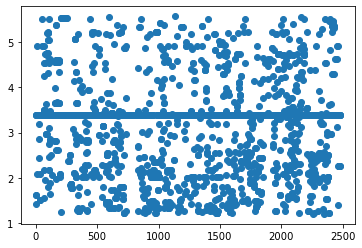

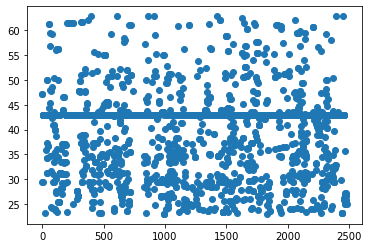

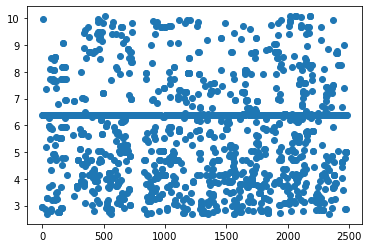

In [27]:
# Visualiser les nuages de points des variables "APRES NETTOYAGE" pour voir a quoi on en a affaire !!
ind = [elem for elem in range(2479)]
for i in range(6,dataPreparation(data_synthese)[0].shape[1]):
    plt.scatter(ind,extraire_col(dataPreparation(data_synthese)[0],i))
    plt.show()

<AxesSubplot:>

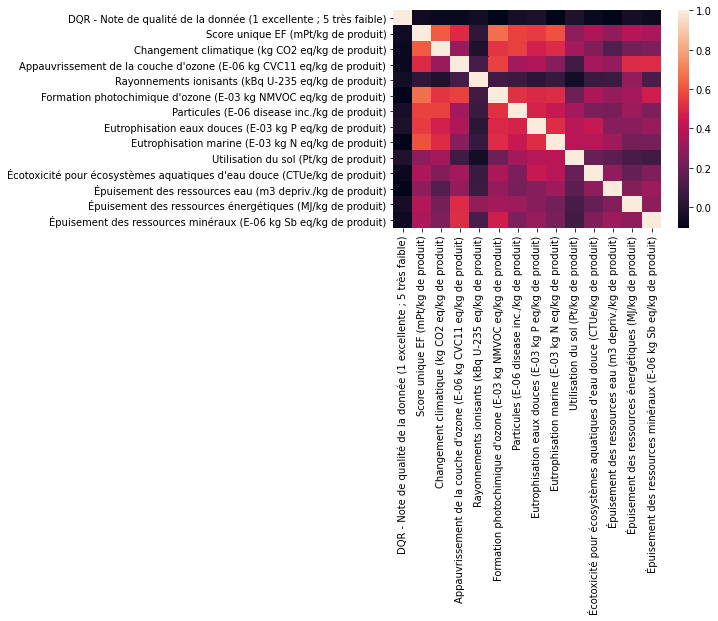

In [28]:
sns.heatmap(dataPreparation(data_synthese)[0].corr())

Les nuages de points et la matrice de correlation sont nettement mieux apres le nottoyage fait ( la fonction "Data preparation" ).
Nous remarquons toute de meme que la variable " DQR Note de qualité .. " n'est pas corrélée avec les autres variables du jeu de données (mise à part elle meme ,heureusement d'ailleurs) . Neomoins , on ne peut pas conclure pour cette variable car elle peut etre fortement corrélée avec la variable cible (qui ne figure pas sur la heatmap precedente)

Nous remarquons que de nouveau les statistiques sont devenues plus propres apres le nettoyage de données ( pas d'outliers , equilibre de distribution de données ... )

##### Generation de dataset (X,Y)

In [29]:
# renvoie le dataset nettoyé
data_synthese_bis = dataPreparation(data_synthese)[0]


# renvoie la variable cible
Y = np.array(extraire_col(data_synthese_bis,0))

# renvoie les variables en transformant les categorielles en numeriques grace au dummies 
X = pd.get_dummies(data_synthese_bis.drop(columns=["Groupe d'aliment"]))
# numerise les valeurs presentes dans le X
X = clust.normalisation(X)
X = np.array(X)
X.shape

(2479, 46)

In [30]:
np.random.seed(96)
iteration = rd.randint(0,4)
X_train,Y_train,X_test,Y_test = ut.crossval_strat(X,Y,5,iteration)

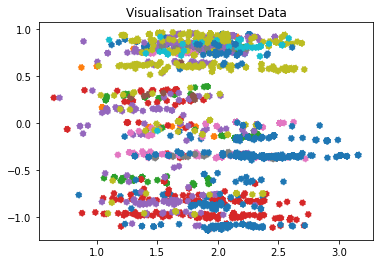

In [56]:
ut.visualiser_Multi(X_train,Y_train,"Visualisation Trainset Data",11)

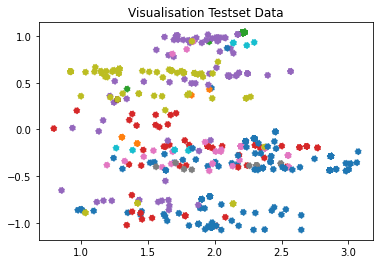

In [57]:
ut.visualiser_Multi(X_test,Y_test,"Visualisation Testset Data",11)

### Evaluation

#### Recherche de parametres optimaux

Regroupé dans un seule fonction , puis appel avec le nom de l'algo associé

In [33]:
def evaluation(X,Y,max_iter,algo="KNN",verbose="False"):
    print("Evaluation de l'algorithme ",algo)
    if(algo == "KNN"): 
        max_iter = 5
        iterations = [elem for elem in range(max_iter)]
        Ks = [elem for elem in range(3,21,2)]
        finalsT = []
        finalsR = []
        for k in Ks:  
            tests = []
            trains = []
            for iteration in iterations:
                Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(X,Y,max_iter,iteration)
                alg = cl.ClassifierKNN_MC(46,k,11)
                alg.train(Xapp,Yapp)
                test_score = alg.accuracy(Xtest,Ytest)
                train_score = alg.accuracy(Xapp,Yapp)
                tests.append(test_score)
                trains.append(train_score)
                if(verbose):
                    print("Score sur le train set pour k = ",k," iteration : ",iteration," est : ",train_score)
                    print("Score sur le test set pour k = ",k," iteration : ",iteration," est : ",test_score)
            finalsT.append(np.mean(tests))
            finalsR.append(np.mean(trains))
        print("Le K qui maximise le score du testset : ",np.argmax(finalsT)+1)
        plt.xlabel("Les valeurs de K")
        plt.ylabel("Le score sur trainset et testset selon K")
        plt.plot(Ks,finalsT)
        plt.plot(Ks,finalsR)
        plt.show(np.argmax(finalsT)+1)
        return
        
    if(algo == "Perceptron"): 
        max_iter = 5
        iterations = [elem for elem in range(max_iter)]
        rates = [elem for elem in np.arange(0.001,0.01,0.001)]
        finalsT = []
        finalsR = []
        for rate in rates:  
            tests = []
            trains = []
            for iteration in iterations:
                Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(X,Y,max_iter,iteration)
                alg = cl.ClassifierPerceptron_MC(46,rate)
                alg.train(Xapp,Yapp)
                test_score = alg.accuracy(Xtest,Ytest)
                train_score = alg.accuracy(Xapp,Yapp)
                tests.append(test_score)
                trains.append(train_score)
                if(verbose):
                    print("Score sur le train set pour learning_rate = ",rate," iteration : ",iteration," est : ",train_score)
                    print("Score sur le test set pour learning_rate = ",rate," iteration : ",iteration," est : ",test_score)
            finalsT.append(np.mean(tests))
            finalsR.append(np.mean(trains))
        print("Le learning_rate qui maximise le score du testset : ",0.001*np.argmax(finalsT))
        plt.xlabel("Les valeurs du learning rate")
        plt.ylabel("Le score sur trainset et testset selon learning rate")
        plt.plot(rates,finalsT)
        plt.plot(rates,finalsR)
        plt.show()
        return 0.001*np.argmax(finalsT)
        
        
    if(algo == "RandomForest"):
        nb_attributs = 23
        max_iter = 5
        iterations = [elem for elem in range(max_iter)]
        arbres = [elem for elem in range(7,13)]
        finalsT = []
        finalsR = []
        for arbre in arbres:
            tests = []
            trains = []
            for iteration in iterations:
                Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(X,Y,max_iter,iteration)
                alg = cl.ClassifierRandomForest(arbre,nb_attributs,0.0)
                alg.train((Xapp,Yapp))
                test_score = alg.accuracy(Xtest,Ytest)
                train_score = alg.accuracy(Xapp,Yapp)
                tests.append(test_score)
                trains.append(train_score)
                if(verbose):
                    print("Score sur le train set pour arbre = ",arbre," iteration : ",iteration," est : ",train_score)
                    print("Score sur le test set pour arbre = ",arbre," iteration : ",iteration," est : ",test_score)
            finalsT.append(np.mean(tests))
            finalsR.append(np.mean(trains))
        print("Le nombre d'arbres qui maximise le score du testset : ",np.argmax(finalsT)+1)
        plt.xlabel("Les valeurs du nombre d'arbres")
        plt.ylabel("Le score sur trainset et testset selon le nombre d'arbres")
        plt.plot(arbres,finalsT)
        plt.plot(arbres,finalsR)
        plt.show()
        return np.argmax(finalsT)+1
        
        
    if(algo == "BaggingTree"):
        pourcentage = 0.7
        max_iter = 5
        iterations = [elem for elem in range(max_iter)]
        arbres = [elem for elem in range(1,7)]
        finalsT = []
        finalsR = []
        for arbre in arbres:
            tests = []
            trains = []
            for iteration in iterations:
                Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(X,Y,max_iter,iteration)
                alg = cl.ClassifierBaggingTree(arbre,pourcentage,0.0,True)
                alg.train((Xapp,Yapp))
                test_score = alg.accuracy(Xtest,Ytest)
                train_score = alg.accuracy(Xapp,Yapp)
                tests.append(test_score)
                trains.append(train_score)
                if(verbose):
                    print("Score sur le train set pour arbre = ",arbre," iteration : ",iteration," est : ",train_score)
                    print("Score sur le test set pour arbre = ",arbre," iteration : ",iteration," est : ",test_score)
            finalsT.append(np.mean(tests))
            finalsR.append(np.mean(trains))
        print("Le nombre d'arbres qui maximise le score du testset : ",np.argmax(finalsT)+1)
        plt.xlabel("Les valeurs du nombre d'arbres")
        plt.ylabel("Le score sur trainset et testset selon le nombre d'arbres")
        plt.plot(arbres,finalsT)
        plt.plot(arbres,finalsR)
        plt.show()
        return np.argmax(finalsT)+1
        
    if(algo == "BaggingTreeO0B"):
        pourcentage = 0.7
        arbres = [elem for elem in range(1,7)]
        finalsR = []
        for arbre in arbres:
            trains = []
            alg = cl.ClassifierBaggingTreeOOB(arbre,pourcentage,0.0,True)
            alg.train((X,Y))
            train_score = alg.accuracy(X,Y)
            trains.append(train_score)
            if(verbose):
                print("Score sur le train set pour arbre = ",arbre," iteration : ",iteration," est : ",train_score)
        finalsR.append(np.mean(trains))
            
        print("Le nombre d'arbres qui maximise le score du testset : ",np.argmax(finalsR)+1)
        plt.xlabel("Les valeurs du nombre d'arbres")
        plt.ylabel("Le score sur trainset et testset selon le nombre d'arbres")
        plt.plot(arbres,finalsR)
        plt.show()
        return np.argmax(finalsT)+1
            
            

Evaluation de l'algorithme  KNN
Le K qui maximise le score du testset :  2


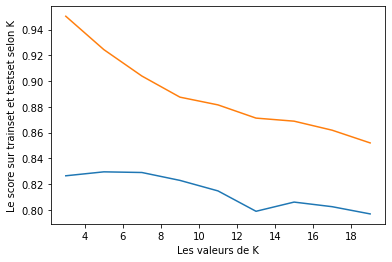

In [248]:
Kopt = evaluation(X_train,Y_train,5,"KNN",False)

Evaluation de l'algorithme  Perceptron
Le learning_rate qui maximise le score du testset :  0.002


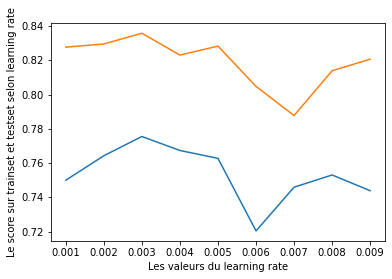

In [250]:
rateopt = evaluation(X_train,Y_train,5,"Perceptron",False)

Evaluation de l'algorithme  RandomForest
Le nombre d'arbres qui maximise le score du testset :  1


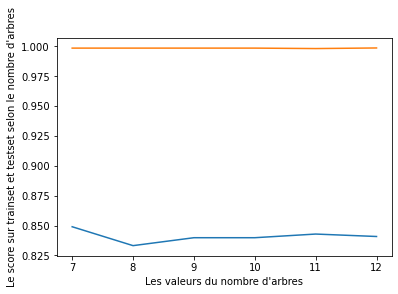

In [251]:
arbre_RFopt = evaluation(X_train,Y_train,5,"RandomForest",False)

In [ ]:
arbre_BGTopt = evaluation(X_train,Y_train,5,"BaggingTree",False)

Evaluation de l'algorithme  BaggingTree


In [ ]:
arbre_BGTOopt = evaluation(X_train,Y_train,5,"BagginTreeOOB",False)

#### Evaluation Finale

In [35]:
def EvalFinale(X,Y,classifier,isTuple):
    np.random.seed(96)
    iteration = rd.randint(0,4)
    X_train,Y_train,X_test,Y_test = ut.crossval_strat(X,Y,5,iteration)
    if(isTuple):
        classifier.train((X_train,Y_train))
    else:
        classifier.train(X_train,Y_train)
        
    print("Accuracy score sur le train set est : ",classifier.accuracy(X_train,Y_train))
    print("Accuracy score sur le test set est : ",classifier.accuracy(X_test,Y_test))

    print("--------------------------------------------")
    print("Affichage de la matrice de confusion")
    Y_pred=[]
    for elem in X_test:
        Y_pred.append(classifier.predict(elem))
    
    print(matrice_Confusion(Y_test,Y_pred))
    print("--------------------------------------------")


    print("---------------------------------------------")
    variance = np.var(Y_pred)
    print("La variance du model sur les données de test est  ",variance)
    sse = np.mean((np.mean(Y_pred) - Y_test)**2)
    biais = sse - variance
    print("Le biais du model sur les données de test est ",biais)


In [36]:
rateopt = 0.003
Kopt = 3
arbre_RFopt = 7

In [45]:
np.random.seed(96)
perceptron_finale_vc = cl.ClassifierPerceptron_MC(len(X_train[0]),rateopt)
EvalFinale(X,Y,perceptron_finale_vc,False)

Accuracy score sur le train set est :  0.8392767453540935
Accuracy score sur le test set est :  0.8360655737704918
--------------------------------------------
Affichage de la matrice de confusion
[[24, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0], [0, 5, 0, 2, 0, 0, 0, 0, 0, 0, 0], [0, 0, 34, 0, 2, 0, 4, 0, 0, 0, 0], [0, 0, 2, 34, 4, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 62, 0, 2, 0, 1, 1, 2], [0, 0, 0, 0, 1, 4, 0, 3, 0, 0, 0], [0, 0, 0, 0, 1, 0, 35, 0, 0, 3, 0], [0, 0, 1, 0, 0, 0, 0, 8, 0, 0, 0], [6, 1, 0, 0, 9, 0, 0, 0, 72, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 1, 6, 0], [0, 0, 6, 19, 0, 0, 1, 0, 0, 0, 124]]
--------------------------------------------
---------------------------------------------
La variance du model sur les données de test est   10.818395592582638
Le biais du model sur les données de test est  0.03466809997316034


In [38]:
algo  = cl.ClassifierKNN_MC(len(X_train[0]),Kopt,11)
EvalFinale(X,Y,algo,False)

Accuracy score sur le train set est :  0.9522852837769965
Accuracy score sur le test set est :  0.8319672131147541
--------------------------------------------
Affichage de la matrice de confusion
[[28, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0], [0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 43, 0, 0, 0, 2, 0, 0, 2, 1], [0, 0, 0, 46, 2, 0, 0, 0, 2, 0, 11], [0, 0, 0, 6, 75, 0, 3, 0, 7, 0, 4], [0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0], [0, 2, 0, 0, 0, 0, 35, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 11, 0, 0, 0], [2, 0, 0, 0, 0, 0, 0, 0, 50, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 12, 8, 8], [0, 0, 0, 2, 0, 0, 1, 0, 3, 0, 102]]
--------------------------------------------
---------------------------------------------
La variance du model sur les données de test est   10.602219665412525
Le biais du model sur les données de test est  0.13758062348834166


In [39]:
algo  = cl.ClassifierRandomForest(arbre_RFopt,23,0.0)
EvalFinale(X,Y,algo,True)

Accuracy score sur le train set est :  0.9984932194876946
Accuracy score sur le test set est :  0.8319672131147541
--------------------------------------------
Affichage de la matrice de confusion
[[28, 1, 0, 2, 1, 0, 0, 2, 2, 0, 2], [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 43, 0, 7, 0, 2, 0, 0, 0, 4], [0, 0, 0, 47, 4, 0, 0, 0, 2, 0, 9], [0, 0, 0, 7, 68, 0, 4, 2, 4, 0, 2], [0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0], [0, 2, 0, 0, 0, 0, 36, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0], [1, 0, 0, 0, 3, 0, 1, 1, 58, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 8, 10, 6], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 103]]
--------------------------------------------
---------------------------------------------
La variance du model sur les données de test est   10.927018946519752
Le biais du model sur les données de test est  -0.13677438860532654


In [ ]:
algo  = cl.ClassifierBaggingTree(arbre_BGTopt,0.7,0.0,True)
EvalFinale(X,Y,algo,True)

In [ ]:
algo  = cl.ClassifierBaggingTreeOOB(arbre_BGT0opt,0.7,0.0,True)
EvalFinale(X,Y,algo,True)

## Prédiction si un aliment est transporté par un avion

In [6]:
data_synthese = pd.read_csv("Donnees_Agribalyse/synthese.csv")
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))

Nombre de lignes:  2479


In [8]:
def dataPreparation(dataframe):
    # Sauvgrader les codes des aliments pour pourvoir interpreter la suite les resultats
    data_synthese_infos = dataframe[["Code AGB","Nom du Produit en Français"]]
    
    # supprimer les colonnes jugées inutiles
    data_synthese_bis = dataframe.drop(columns=["Code AGB","Code CIQUAL","Nom du Produit en Français","LCI Name"])
   
    # remplacer les erreurs de frappe de la variable "Preparation"
    data_synthese_bis.loc[data_synthese_bis["Préparation"]=="Four ","Préparation"] = "Four"
    data_synthese_bis.loc[data_synthese_bis["Préparation"]=="Micro onde ","Préparation"] = "Micro onde"
    data_synthese_bis.loc[data_synthese_bis["Préparation"]=="Pas de préparation ","Préparation"] = "Pas de préparation"
   
    # Identifier les outliers et les remplacer par la valeur medianne de la variable associée
    here = data_synthese_bis.describe()
    colonnes = [col for col in here.columns if col != "Transport par avion (1 : par avion)"]
    for col in colonnes:
        outliers = trouver_outliers(data_synthese_bis,col)[0]
        Q1 =  trouver_outliers(data_synthese_bis,col)[1]
        Q3 =  trouver_outliers(data_synthese_bis,col)[2]
        data_synthese_bis.loc[(outliers.index ,col)] = (Q3+Q1)/2
    
    # Avoir toutes les variable sur tout si certaines sont fortement corrélées entre elles peut biaiser les resultats
    # du modele.c'est pour ca que nous supprimons les variables qui sont fortement corrélées ( > seuil== 0.8 par exemple)
    corr_col = correlationBetweenFeatures(data_synthese_bis,0.8)
    data_synthese_bis.drop(corr_col,axis=1,inplace=True)
    
    # retourne le dataset préparé et les infos du dataset
    return data_synthese_bis,data_synthese_infos

In [9]:
# renvoie le dataset nettoyé
data_synthese_bis = dataPreparation(data_synthese)[0]


# renvoie la variable cible
Y1 = np.array(extraire_col(data_synthese_bis,3))

# renvoie les variables en transformant les categorielles en numeriques grace au dummies 
X1 = pd.get_dummies(data_synthese_bis.drop(columns=["Transport par avion (1 : par avion)"]))
# numerise les valeurs presentes dans le X
X1 = clust.normalisation(X1)
X1 = np.array(X1)
X1.shape

(2479, 118)

<AxesSubplot:ylabel='count'>

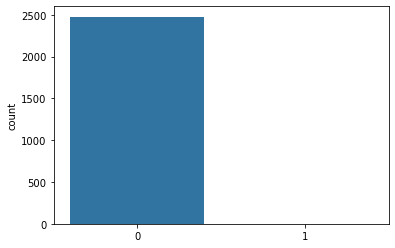

In [67]:
sns.countplot(x=Y1)

In [69]:
def evaluation(X,Y,max_iter,algo="KNN",verbose="False"):
    print("Evaluation de l'algorithme ",algo)
    if(algo == "KNN"): 
        max_iter = 5
        iterations = [elem for elem in range(max_iter)]
        Ks = [elem for elem in range(3,21,2)]
        finalsT = []
        finalsR = []
        for k in Ks:  
            tests = []
            trains = []
            for iteration in iterations:
                Xapp,Yapp,Xtest,Ytest = ut.crossval(X,Y,max_iter,iteration)
                alg = cl.ClassifierKNN_MC(X.shape[1],k,2)
                alg.train(Xapp,Yapp)
                test_score = alg.accuracy(Xtest,Ytest)
                train_score = alg.accuracy(Xapp,Yapp)
                tests.append(test_score)
                trains.append(train_score)
                if(verbose):
                    print("Score sur le train set pour k = ",k," iteration : ",iteration," est : ",train_score)
                    print("Score sur le test set pour k = ",k," iteration : ",iteration," est : ",test_score)
            finalsT.append(np.mean(tests))
            finalsR.append(np.mean(trains))
        print("Le K qui maximise le score du testset : ",np.argmax(finalsT)+1)
        plt.xlabel("Les valeurs de K")
        plt.ylabel("Le score sur trainset et testset selon K")
        plt.plot(Ks,finalsT)
        plt.plot(Ks,finalsR)
        plt.show(np.argmax(finalsT)+1)
        return
        
    if(algo == "Perceptron"): 
        max_iter = 5
        iterations = [elem for elem in range(max_iter)]
        rates = [elem for elem in np.arange(0.001,0.01,0.001)]
        finalsT = []
        finalsR = []
        for rate in rates:  
            tests = []
            trains = []
            for iteration in iterations:
                Xapp,Yapp,Xtest,Ytest = ut.crossval(X,Y,max_iter,iteration)
                alg = cl.ClassifierPerceptron_MC(X.shape[1],rate)
                alg.train(Xapp,Yapp)
                test_score = alg.accuracy(Xtest,Ytest)
                train_score = alg.accuracy(Xapp,Yapp)
                tests.append(test_score)
                trains.append(train_score)
                if(verbose):
                    print("Score sur le train set pour learning_rate = ",rate," iteration : ",iteration," est : ",train_score)
                    print("Score sur le test set pour learning_rate = ",rate," iteration : ",iteration," est : ",test_score)
            finalsT.append(np.mean(tests))
            finalsR.append(np.mean(trains))
        print("Le learning_rate qui maximise le score du testset : ",0.001+np.argmax(finalsT))
        plt.xlabel("Les valeurs du learning rate")
        plt.ylabel("Le score sur trainset et testset selon learning rate")
        plt.plot(rates,finalsT)
        plt.plot(rates,finalsR)
        plt.show()
        return 0.001*np.argmax(finalsT)
        
        
    if(algo == "RandomForest"):
        nb_attributs = 23
        max_iter = 5
        iterations = [elem for elem in range(max_iter)]
        arbres = [elem for elem in range(7,13)]
        finalsT = []
        finalsR = []
        for arbre in arbres:
            tests = []
            trains = []
            for iteration in iterations:
                Xapp,Yapp,Xtest,Ytest = ut.crossval(X,Y,max_iter,iteration)
                alg = cl.ClassifierRandomForest(arbre,nb_attributs,0.0)
                alg.train((Xapp,Yapp))
                test_score = alg.accuracy(Xtest,Ytest)
                train_score = alg.accuracy(Xapp,Yapp)
                tests.append(test_score)
                trains.append(train_score)
                if(verbose):
                    print("Score sur le train set pour arbre = ",arbre," iteration : ",iteration," est : ",train_score)
                    print("Score sur le test set pour arbre = ",arbre," iteration : ",iteration," est : ",test_score)
            finalsT.append(np.mean(tests))
            finalsR.append(np.mean(trains))
        print("Le nombre d'arbres qui maximise le score du testset : ",np.argmax(finalsT)+1)
        plt.xlabel("Les valeurs du nombre d'arbres")
        plt.ylabel("Le score sur trainset et testset selon le nombre d'arbres")
        plt.plot(arbres,finalsT)
        plt.plot(arbres,finalsR)
        plt.show()
        return np.argmax(finalsT)+6
        
        
    if(algo == "BaggingTree"):
        pourcentage = 0.7
        max_iter = 5
        iterations = [elem for elem in range(max_iter)]
        arbres = [elem for elem in range(1,7)]
        finalsT = []
        finalsR = []
        for arbre in arbres:
            tests = []
            trains = []
            for iteration in iterations:
                Xapp,Yapp,Xtest,Ytest = ut.crossval(X,Y,max_iter,iteration)
                alg = cl.ClassifierBaggingTree(arbre,pourcentage,0.0,True)
                alg.train((Xapp,Yapp))
                test_score = alg.accuracy(Xtest,Ytest)
                train_score = alg.accuracy(Xapp,Yapp)
                tests.append(test_score)
                trains.append(train_score)
                if(verbose):
                    print("Score sur le train set pour arbre = ",arbre," iteration : ",iteration," est : ",train_score)
                    print("Score sur le test set pour arbre = ",arbre," iteration : ",iteration," est : ",test_score)
            finalsT.append(np.mean(tests))
            finalsR.append(np.mean(trains))
        print("Le nombre d'arbres qui maximise le score du testset : ",np.argmax(finalsT)+1)
        plt.xlabel("Les valeurs du nombre d'arbres")
        plt.ylabel("Le score sur trainset et testset selon le nombre d'arbres")
        plt.plot(arbres,finalsT)
        plt.plot(arbres,finalsR)
        plt.show()
        return np.argmax(finalsT)+1
        
    if(algo == "BaggingTreeO0B"):
        pourcentage = 0.7
        arbres = [elem for elem in range(1,7)]
        finalsR = []
        for arbre in arbres:
            trains = []
            alg = cl.ClassifierBaggingTreeOOB(arbre,pourcentage,0.0,True)
            alg.train((X,Y))
            train_score = alg.accuracy(X,Y)
            trains.append(train_score)
            if(verbose):
                print("Score sur le train set pour arbre = ",arbre," iteration : ",iteration," est : ",train_score)
        finalsR.append(np.mean(trains))
            
        print("Le nombre d'arbres qui maximise le score du testset : ",np.argmax(finalsR)+1)
        plt.xlabel("Les valeurs du nombre d'arbres")
        plt.ylabel("Le score sur trainset et testset selon le nombre d'arbres")
        plt.plot(arbres,finalsR)
        plt.show()
        return np.argmax(finalsT)+1
            
            

In [101]:
def EvalFinale(X,Y,classifier,isTuple):
    np.random.seed(96)
    iteration = rd.randint(0,4)
    X_train,Y_train,X_test,Y_test = ut.crossval(X,Y,5,iteration)
    if(isTuple):
        classifier.train((X_train,Y_train))
    else:
        classifier.train(X_train,Y_train)
        
    print("Accuracy score sur le train set est : ",classifier.accuracy(X_train,Y_train))
    print("Accuracy score sur le test set est : ",classifier.accuracy(X_test,Y_test))

    print("--------------------------------------------")
    print("Affichage de la matrice de confusion")
    Y_pred=[]
    for elem in X_test:
        Y_pred.append(classifier.predict(elem))
    
    print(matrice_Confusion(Y_test,Y_pred))
    print("--------------------------------------------")


    print("---------------------------------------------")
    variance = np.var(Y_pred)
    print("La variance du model sur les données de test est  ",variance)
    sse = np.mean((np.mean(Y_pred) - Y_test)**2)
    biais = sse - variance
    print("Le biais du model sur les données de test est ",biais)


### Evaluation

In [71]:
np.random.seed(96)
iteration = rd.randint(0,4)
X1_train,Y1_train,X1_test,Y1_test = ut.crossval(X1,Y1,5,iteration)

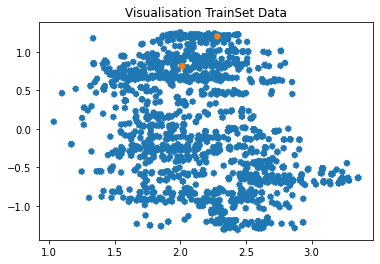

In [72]:
ut.visualiser_Multi(X1_train,Y1_train,"Visualisation TrainSet Data",2)

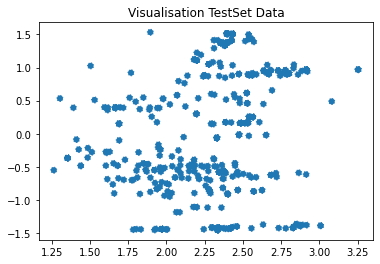

In [73]:
ut.visualiser_Multi(X1_test,Y1_test,"Visualisation TestSet Data",2)

Evaluation de l'algorithme  KNN
Le K qui maximise le score du testset :  1


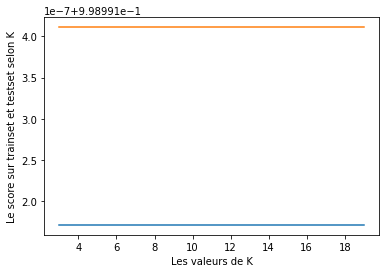

In [152]:
Kopt1 = evaluation(X1_train,Y1_train,5,"KNN",False)

Evaluation de l'algorithme  Perceptron
Le learning_rate qui maximise le score du testset :  0.001


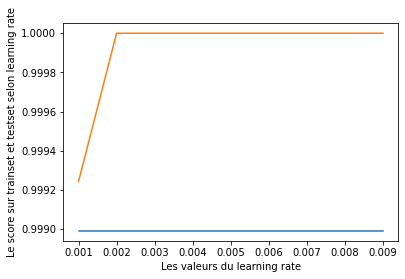

In [139]:
rateopt1 = evaluation(X1_train,Y1_train,5,"Perceptron",False)

Evaluation de l'algorithme  RandomForest
Le nombre d'arbres qui maximise le score du testset :  1


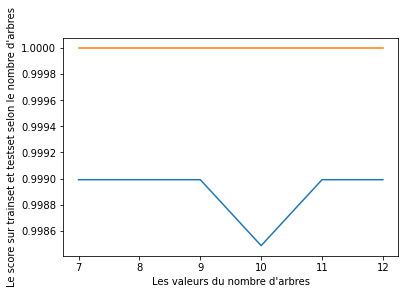

In [154]:
arbre_RFopt1 = evaluation(X1_train,Y1_train,5,"RandomForest",False)

In [ ]:
arbre_BGopt1 = evaluation(X1_train,Y1_train,5,"BaggingTree",False)

In [ ]:
arbre_BGTOopt1 = evaluation(X1_train,Y1_train,5,"BaggingTreeOOB",False)

In [74]:
rate = 0.001
K = 2
arbre = 7

### Evaluation Finale

In [83]:
np.random.seed(96)
perceptron_finale_vc = cl.ClassifierPerceptron_MC(len(X1_train[0]),rate)
EvalFinale(X1,Y1,perceptron_finale_vc,False)

Accuracy score sur le train set est :  0.9989914271306102
Accuracy score sur le test set est :  1.0
--------------------------------------------
Affichage de la matrice de confusion
[[496]]
--------------------------------------------
---------------------------------------------
La variance du model sur les données de test est   0.0
Le biais du model sur les données de test est  0.0


In [84]:
algo  = cl.ClassifierKNN_MC(len(X1_train[0]),K,2)
EvalFinale(X1,Y1,algo,False)

Accuracy score sur le train set est :  0.9989914271306102
Accuracy score sur le test set est :  1.0
--------------------------------------------
Affichage de la matrice de confusion
[[496]]
--------------------------------------------
---------------------------------------------
La variance du model sur les données de test est   0.0
Le biais du model sur les données de test est  0.0


In [85]:
algo  = cl.ClassifierRandomForest(arbre,23,0.0)
EvalFinale(X1,Y1,algo,True)

Accuracy score sur le train set est :  1.0
Accuracy score sur le test set est :  1.0
--------------------------------------------
Affichage de la matrice de confusion
[[496]]
--------------------------------------------
---------------------------------------------
La variance du model sur les données de test est   0.0
Le biais du model sur les données de test est  0.0


les taux de bonne classification de nos algo pour cette problematique est "trop" parfait . Nos modeles sont tombés dans le surapprentissage causé par l'enorme desiquilibre de classes au niveau de la variable cible.
- Solution 01 : essayer de re-echantilloner la classe minoritaire pour equilibré la classe en generant des exemples d'un maniere aleatoires parmi ceux deja exsitants dans la base et dont le label = la classe minoritaire .

In [ ]:
algo  = cl.ClassifierBaggingTree(arbre_BGopt1,0.7,0.0,True)
EvalFinale(X1,Y1,algo,True)

In [ ]:
algo  = cl.ClassifierBaggingTreeOOB(arbre_BGTOopt1,0.7,0.0,True)
EvalFinale(X1,Y1,algo,True)

### Sampling

In [10]:
# Cette fonction permet de reequilibrer les classes de la variable cible 
# en duplicant d'une maniere random un exemple de la classe minoritaire
X1_sample,Y1_sample = random_sampling(X1,Y1)
print(X1_sample.shape)
print(Y1_sample.shape)
# passer de 2497 exemples à 4954 exemples

(4954, 118)
(4954,)


<AxesSubplot:ylabel='count'>

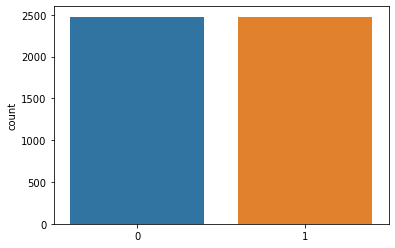

In [79]:
sns.countplot(x=Y1_sample)

#### Evaluation

In [90]:
np.random.seed(96)
iteration = rd.randint(0,4)
X1_train_sample,Y1_train_sample,X1_test_sample,Y1_test_sample = ut.crossval_strat(X1_sample,Y1_sample,5,iteration)

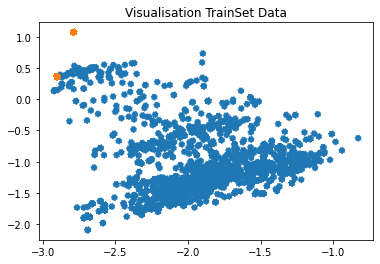

In [81]:
ut.visualiser_Multi(X1_train_sample,Y1_train_sample,"Visualisation TrainSet Data",11)

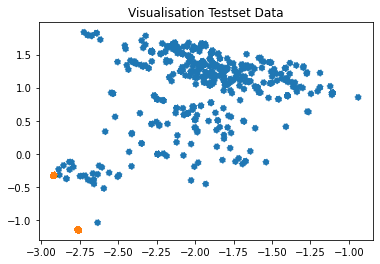

In [82]:
ut.visualiser_Multi(X1_test_sample,Y1_test_sample,"Visualisation Testset Data",11)

Evaluation de l'algorithme  KNN
Le K qui maximise le score du testset :  1


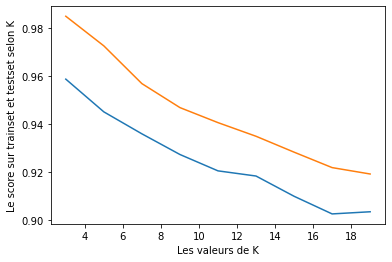

In [110]:
KoptS = evaluation(X_train_sample,Y_train_sample,5,"KNN",False)

Evaluation de l'algorithme  Perceptron
Le learning_rate qui maximise le score du testset :  0.0


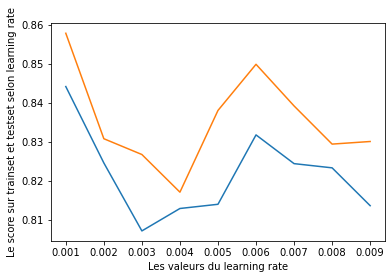

In [111]:
rateOptS = evaluation(X_train_sample,Y_train_sample,5,"Perceptron",False)

Evaluation de l'algorithme  RandomForest
Le nombre d'arbres qui maximise le score du testset :  5


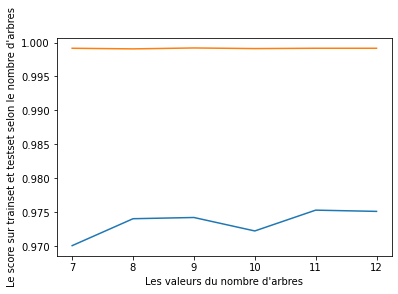

In [112]:
arbre_RFoptS = evaluation(X_train_sample,Y_train_sample,5,"RandomForest",False)

In [ ]:
arbre_BGToptS = evaluation(X_train_sample,Y_train_sample,5,"BaggingTree",False)

In [ ]:
arbre_BGTOoptS = evaluation(X_train_sample,Y_train_sample,5,"BaggingTreeOOB",False)

#### Evaluation Finale

In [91]:
rateOptS = 0.001
K = 2
arbre = 12

In [109]:
np.random.seed(96)
perceptron_finale_vc = cl.ClassifierPerceptron_MC(len(X1_train_sample[0]),rateOptS)
EvalFinale(X1,Y1,perceptron_finale_vc,False)

Accuracy score sur le train set est :  0.9994959677419355
Accuracy score sur le test set est :  1.0
--------------------------------------------
Affichage de la matrice de confusion
[[495]]
--------------------------------------------
---------------------------------------------
La variance du model sur les données de test est   0.0
Le biais du model sur les données de test est  0.0


In [112]:
algo  = cl.ClassifierKNN_MC(len(X1_train_sample[0]),K,11)
EvalFinale(X1,Y1,algo,False)

Accuracy score sur le train set est :  0.998991935483871
Accuracy score sur le test set est :  1.0
--------------------------------------------
Affichage de la matrice de confusion
[[495]]
--------------------------------------------
---------------------------------------------
La variance du model sur les données de test est   0.0
Le biais du model sur les données de test est  0.0


In [111]:
algo  = cl.ClassifierRandomForest(arbre,23,0.0)
EvalFinale(X1,Y1,algo,True)

Accuracy score sur le train set est :  1.0
Accuracy score sur le test set est :  1.0
--------------------------------------------
Affichage de la matrice de confusion
[[496]]
--------------------------------------------
---------------------------------------------
La variance du model sur les données de test est   0.0
Le biais du model sur les données de test est  0.0


Nous remarquons que nous avons pas regler le probleme meme en faisant un reechantillonage d'une maniere random.
- Solution 2 : faire du reechantillonage d'une maniere intelligente par exemple : generer des exemple en choisissant la valeur la plus frequete d'une colonne par les exemples de la classe minoritaire ... Etc .

Solution à voir ... .

In [ ]:
algo  = cl.ClassifierBaggingTree(arbre_BGToptS,0.7,0.0,True)
EvalFinale(X,Y,algo,True)

In [ ]:
algo  = cl.ClassifierBaggingTreeOOB(arbre_BGTOoptS,0.7,0.0,True)
EvalFinale(X,Y,algo,True)

## Un autre exemple de problematique qui peut etre traité

### Prédiction du nombre d'ingredients d'un aliment

In [176]:
data_ingredient

,Ciqual AGB,Ciqual code,Nom Français,Groupe d'aliment,Sous-groupe d'aliment,LCI Name,Ingredients,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jaune d'œuf,0.039743,0.164754,0.014089,...,0.046616,0.006761,0.029441,0.052027,1.329230,16.984964,7.404112,0.337769,1.475548,0.251356
1,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Ail,0.004417,0.011444,0.002512,...,0.000781,0.000105,0.000328,0.004760,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
2,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jus de citron,0.019375,0.061230,0.007842,...,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
3,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Huile d'olive,0.445364,1.161825,0.136467,...,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.100950,9.374618,12.100965,4.424012
4,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Autres étapes,0.080761,0.571172,0.126768,...,0.024611,0.002630,0.008368,0.090374,1.295442,4.529954,11.433712,0.759522,22.626111,1.278583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5666,19552,19552,"Yaourt à la grecque, sur lit de fruits",lait et produits laitiers,produits laitiers frais et assimilés,"Yogurt, Greek-style, on a bed of fruits",Fraise,0.121232,0.113532,0.637141,...,0.027982,0.000952,0.003176,0.035963,0.370286,3.561618,195.859930,1.702002,1.587775,3.330941
5667,19552,19552,"Yaourt à la grecque, sur lit de fruits",lait et produits laitiers,produits laitiers frais et assimilés,"Yogurt, Greek-style, on a bed of fruits",Autres étapes,0.070305,0.549462,0.115755,...,0.023034,0.002426,0.007428,0.080773,1.159934,4.096425,6.238759,0.248905,21.610336,1.176044
5668,19860,19860,"Yaourt à la grecque, nature",lait et produits laitiers,produits laitiers frais et assimilés,"Yogurt, Greek-style, plain",Lait,0.063101,0.693950,0.010273,...,0.043025,0.006846,0.029968,0.047026,8.579385,62.085522,1.178242,0.013914,1.062461,0.019234
5669,19860,19860,"Yaourt à la grecque, nature",lait et produits laitiers,produits laitiers frais et assimilés,"Yogurt, Greek-style, plain",Lait demi-écremé,0.106409,1.198262,0.031746,...,0.089744,0.013406,0.058485,0.107689,3.903060,66.972761,17.562407,0.373698,3.073724,0.642726


In [164]:
print("Le nombre d'ingredients possibles est :",len(np.unique(extraire_col(data_ingredient,6),return_counts=True)[0]))
print("Le nombre d'aliments presents dans le jeu de données est ",len(np.unique(extraire_col(data_ingredient,0),return_counts=True)[0]))

Le nombre d'ingredients possibles est : 213
Le nombre d'aliments presents dans le jeu de données est  1038


En moyenne , un aliment a  (5671/1038)  ingredients dans sa recette

In [177]:
print("Les ingerients sont : ")
np.unique(extraire_col(data_ingredient,6),return_counts=True)[0]

Les ingerients sont : 


array(['Abats de bœuf', 'Abats de porc', 'Abats de poulet',
       'Abats de veau', 'Abricot', 'Ail', 'Amande', 'Amidon de maïs',
       'Ananas', 'Anchois', 'Anchois commun', 'Asperges', 'Aubergine',
       'Autres étapes', 'Avocat', 'Avoine', 'Baie', 'Basilic', 'Beurre',
       'Bière', "Blanc d'oeuf", 'Blé dur', "Boisson à base d'avoine",
       'Boisson à base de soja', 'Bouillon', 'Brocoli', 'Bœuf haché',
       'Cacahuète', 'Cacao', 'Café', 'Calamar', 'Camembert', 'Cannelle ',
       'Carotte', 'Cassonade', 'Cerises', 'Champignon', 'Chicorée',
       'Chicorée rouge', 'Chocolat au lait', 'Chocolat noir',
       'Chou blanc', 'Chou vert', 'Choucroute', 'Choufleur', 'Châtaigne',
       'Ciboulette ou oignon de printemps', 'Clous de girofle', 'Comté',
       'Concentré de tomates 30° Brix', 'Concombre', 'Congre',
       'Coquille Saint-Jacques', 'Coriandre', 'Courgette',
       'Cresson de jardin', 'Crevette', 'Crème', 'Céleri', 'Céleri-rave',
       'Eau de Vie', 'Emmental', 'Endiv

Nous allons commencer par generer notre jeu de données en creeons une colonne "Nombre d'ingredients" qui representera le nombre d'ingredients pour chaque aliment ( 1038 )

In [178]:
def definir_Dataset(dataframe):
    res = []
    dataframe = dataframe[extraire_col(dataframe,6) != "Autres étapes"]
    gkk = dataframe.groupby(['Ciqual AGB']).first().reset_index()  
    dataframe_res = gkk[[col for col in cols if (col == "Groupe d'aliment" or col == "Sous-groupe d'aliment")]]
    nb_ingr_par_aliment = pd.DataFrame(np.array(dataframe.groupby(['Ciqual AGB']).count()["Ingredients"]),columns=["Nombre d'ingredient"])
    dt_res1= pd.concat([dataframe_res,nb_ingr_par_aliment],axis=1)
    data = data_ingredient.groupby(['Ciqual AGB']).mean()    
    dt = pd.DataFrame(np.array(data),columns=data.columns)
    resfin = pd.concat([dt_res1,dt],axis=1)
    index_with_nan = resfin.index[resfin.iloc[:,0].isnull()]
    resfin.drop(index_with_nan,0, inplace=True)
    index_with_nan = resfin.index[resfin.iloc[:,1].isnull()]
    resfin.drop(index_with_nan,0, inplace=True)
    resfin.drop(columns=["Ciqual code"],inplace=True)
    return resfin,nb_ingr_par_aliment,dataframe_res

In [179]:
cols = data_ingredient.columns

In [206]:
data_ingredient_bis = definir_Dataset(data_ingredient)[0]

In [207]:
np.unique(extraire_col(definir_Dataset(data_ingredient)[0],2),return_counts=True)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 12., 14.]),
 array([ 29, 148, 174, 181, 253, 110,  58,  47,  19,  12,   3,   2],
       dtype=int64))

In [220]:
Y2 = extraire_col(data_ingredient_bis,2)
X2 = np.array(pd.get_dummies(data_ingredient_bis.drop(columns=["Nombre d'ingredient"])))
# X2 = np.array(clust.normalisation(X2))
X2.shape

(1036, 70)

In [221]:
np.random.seed(96)
iteration = rd.randint(0,4)
X2_train,Y2_train,X2_test,Y2_test = ut.crossval(X2,Y2,5,iteration)

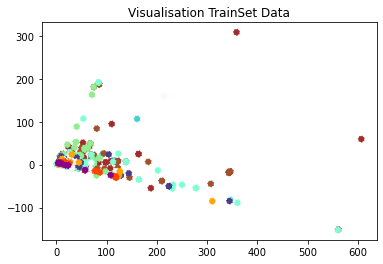

In [222]:
ut.visualiser_Multi(X2_train,Y2_train,"Visualisation TrainSet Data",12)

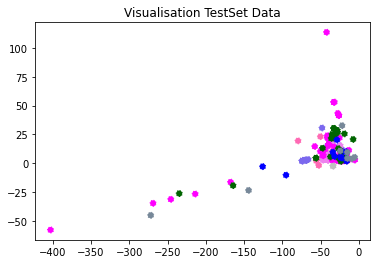

In [223]:
ut.visualiser_Multi(X2_test,Y2_test,"Visualisation TestSet Data",12)